In [1]:
# General data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
df.drop(['body','home.dest','boat','cabin'],axis=1,inplace=True)
df.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [4]:
df['age'].fillna(round(df['age'].mean()),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [5]:
df.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [6]:
X = df.drop(columns = ['name','ticket','survived'],axis=1)
y=df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(C=1.0, random_state=1, kernel='linear')
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
print('Support Vector Classifier Accuracy', accuracy_score(pred, y_test))

Support Vector Classifier Accuracy 0.7557251908396947


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print('Decision Tree Classifier Accuracy', accuracy_score(pred, y_test))

Decision Tree Classifier Accuracy 0.7595419847328244


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 36) 
knn.fit(X_train, y_train)  
pred = knn.predict(X_test)  
print('K Nearest Neighbors Classifier Accuracy', accuracy_score(pred, y_test))

K Nearest Neighbors Classifier Accuracy 0.6641221374045801


In [10]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output node

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
66/66 [==============================] - 5s 15ms/step - loss: 0.8595 - accuracy: 0.5931 - val_loss: 0.7044 - val_accuracy: 0.5802
Epoch 2/50
66/66 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.6628 - val_loss: 0.6271 - val_accuracy: 0.6679
Epoch 3/50
66/66 [==============================] - 0s 5ms/step - loss: 0.5896 - accuracy: 0.6972 - val_loss: 0.6600 - val_accuracy: 0.6069
Epoch 4/50
66/66 [==============================] - 0s 5ms/step - loss: 0.5775 - accuracy: 0.7240 - val_loss: 0.5930 - val_accuracy: 0.7061
Epoch 5/50
66/66 [==============================] - 0s 7ms/step - loss: 0.5708 - accuracy: 0.7221 - val_loss: 0.5703 - val_accuracy: 0.7061
Epoch 6/50
66/66 [==============================] - 0s 5ms/step - loss: 0.5515 - accuracy: 0.7450 - val_loss: 0.5519 - val_accuracy: 0.7099
Epoch 7/50
66/66 [==============================] - 0s 5ms/step - loss: 0.5474 - accuracy: 0.7479 - val_loss: 0.5423 - val_accuracy: 0.7290
Epoch 8/50
66/66 [=

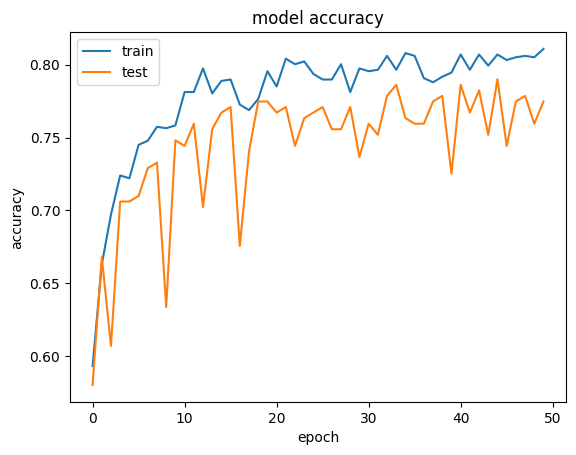

In [11]:
# plot the accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()